In [21]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
import platform
import re

sns.set(font='sans-serif')
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

In [22]:
theOS = list(platform.uname())[0]
if theOS == 'Windows':
    theOS = '\\'
    theEncode = 'utf-8-sig'
else:
    theOS = '/'
    theEncode = 'utf-8'

df = pd.read_csv('../data/ta_feng_all_months_merged.csv')
## 時間格式轉換
df['Date'] = pd.to_datetime(df['TRANSACTION_DT'])

df

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,Date
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30,2000-11-01
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46,2000-11-01
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166,2000-11-01
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38,2000-11-01
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18,2000-11-01
...,...,...,...,...,...,...,...,...,...,...
817736,2/28/2001,312790,35-39,114,530501,4713317035042,2,80,118,2001-02-28
817737,2/28/2001,57486,40-44,115,530209,4710731060124,1,40,55,2001-02-28
817738,2/28/2001,733526,>65,Unknown,510539,4716340052307,1,78,115,2001-02-28
817739,2/28/2001,173704,45-49,115,520457,4714276145315,1,90,96,2001-02-28


## 計算毛利潤 Gross Profit

In [23]:
df['gross_profit'] = df['SALES_PRICE'] - df['ASSET']
df

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,Date,gross_profit
0,11/1/2000,1104905,45-49,115,110411,4710199010372,2,24,30,2000-11-01,6
1,11/1/2000,418683,45-49,115,120107,4710857472535,1,48,46,2000-11-01,-2
2,11/1/2000,1057331,35-39,115,100407,4710043654103,2,142,166,2000-11-01,24
3,11/1/2000,1849332,45-49,Others,120108,4710126092129,1,32,38,2000-11-01,6
4,11/1/2000,1981995,50-54,115,100205,4710176021445,1,14,18,2000-11-01,4
...,...,...,...,...,...,...,...,...,...,...,...
817736,2/28/2001,312790,35-39,114,530501,4713317035042,2,80,118,2001-02-28,38
817737,2/28/2001,57486,40-44,115,530209,4710731060124,1,40,55,2001-02-28,15
817738,2/28/2001,733526,>65,Unknown,510539,4716340052307,1,78,115,2001-02-28,37
817739,2/28/2001,173704,45-49,115,520457,4714276145315,1,90,96,2001-02-28,6


## 排名: 計算每個商品總類賺了多少並找到雜貨店內賺最多的商品 

In [24]:
## 將商品種類轉成字串
df['PRODUCT_SUBCLASS'] = df['PRODUCT_SUBCLASS'].astype(str)

pdbar = df[['PRODUCT_SUBCLASS','gross_profit']].groupby("PRODUCT_SUBCLASS", as_index = False)['gross_profit'].sum()
pdbar = pdbar.sort_values(by = 'gross_profit', ascending = False)
pdbar.to_csv('gross_profit.csv')
pdbar


/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


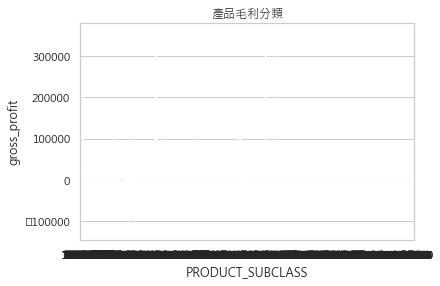

In [5]:
## 視覺化
ax = sns.barplot(x="PRODUCT_SUBCLASS", 
                 y="gross_profit", 
                 data=pdbar
                 ).set_title("產品毛利分類")

In [6]:
## 列出前十名的商品
pdbar_top = pdbar.sort_values(by = 'gross_profit', ascending = False)[:10]
pdbar_top

,PRODUCT_SUBCLASS,gross_profit
456,320402,356563
1168,560402,340999
1117,560201,320217
17,100205,201537
957,530101,184621
966,530110,161600
500,470103,150775
961,530105,135059
1,100102,132943
205,110401,131450


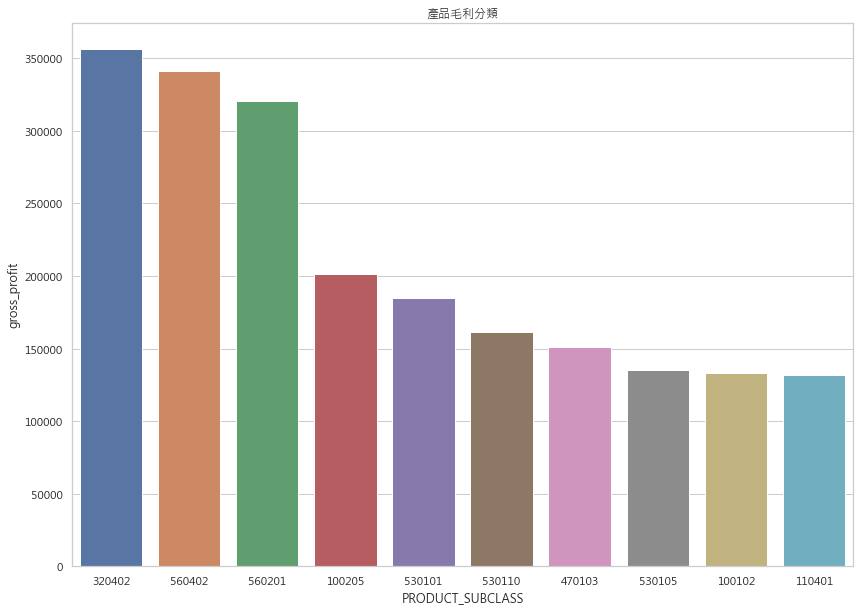

In [7]:
## 視覺化
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="PRODUCT_SUBCLASS", 
                 y="gross_profit", 
                 data=pdbar_top
                 ).set_title("產品毛利分類")


## 加入年齡層進行分類 (列出前幾名的商品種類)

In [8]:
pdbar = df[['PRODUCT_SUBCLASS','AGE_GROUP','gross_profit']].groupby(['PRODUCT_SUBCLASS','AGE_GROUP'], as_index = False)['gross_profit'].sum()
pdbar_top = pdbar.sort_values(by = 'gross_profit', ascending = False)[:10]
pdbar_top

,PRODUCT_SUBCLASS,AGE_GROUP,gross_profit
9590,560402,35-39,102704
9231,560201,30-34,95169
9232,560201,35-39,85341
9589,560402,30-34,75138
4163,320402,40-44,70820
4162,320402,35-39,63010
4164,320402,45-49,55540
9588,560402,25-29,52282
4161,320402,30-34,50696
9230,560201,25-29,50066


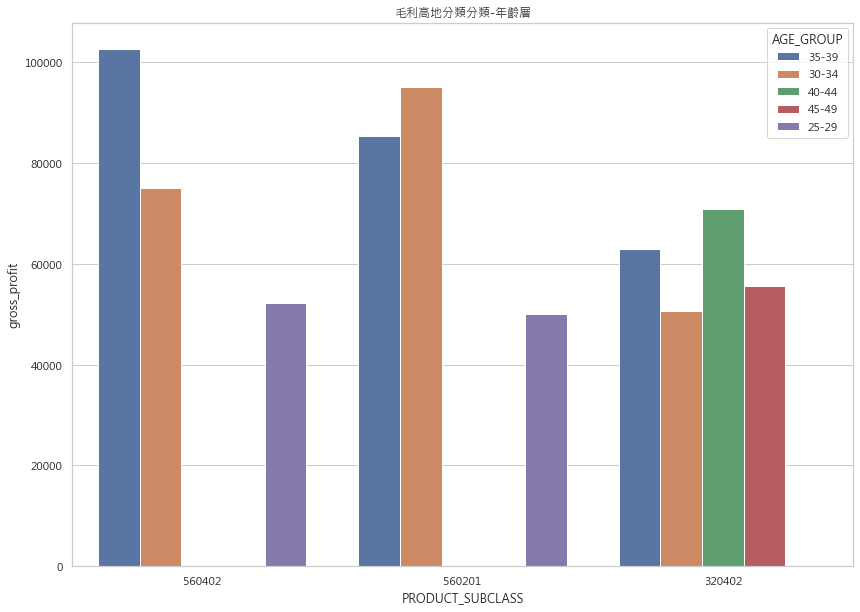

In [9]:
f, ax= plt.subplots(figsize = (14, 10))
ax = sns.barplot(x="PRODUCT_SUBCLASS", 
                 y="gross_profit", 
                 hue="AGE_GROUP", 
                 data=pdbar_top,
                 estimator=np.sum
                 ).set_title("毛利高地分類分類-年齡層")

## 計算每天的交易額

In [10]:
pdbar = df[['Date','gross_profit']].groupby('Date', as_index = False)['gross_profit'].sum()
pdbar

,Date,gross_profit
0,2000-11-01,14278
1,2000-11-02,130448
2,2000-11-03,139951
3,2000-11-04,204349
4,2000-11-05,291822
...,...,...
115,2001-02-24,165157
116,2001-02-25,254420
117,2001-02-26,77882
118,2001-02-27,75444


In [11]:
## 轉換時間格式
date = []
for i in range(len(pdbar)):
    date.append(datetime.strftime(pdbar['Date'][i], '%m-%d'))
pdbar['Date'] = date
pdbar

,Date,gross_profit
0,11-01,14278
1,11-02,130448
2,11-03,139951
3,11-04,204349
4,11-05,291822
...,...,...
115,02-24,165157
116,02-25,254420
117,02-26,77882
118,02-27,75444


## 觀察前30天的變化 11月1日~11月30日

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


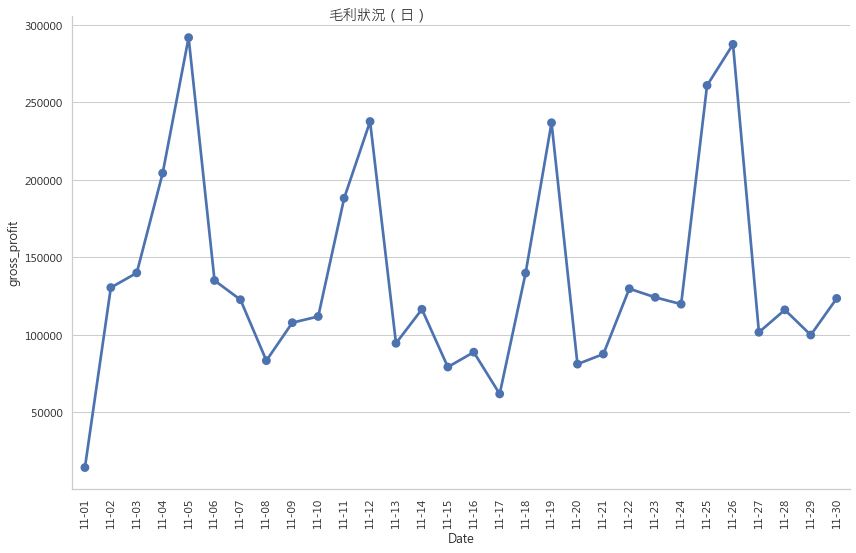

In [12]:
ax = sns.factorplot(x="Date", 
                    y="gross_profit", 
                    estimator=np.sum,
                    data=pdbar[:30]
                    #kind = 'bar,swarm,violin,box'
                    )
ax.set_xticklabels(rotation=90)
ax.fig.suptitle('毛利狀況（日）')
plt.gcf().set_size_inches(15, 8)

## 觀察每月的交易額變化

In [13]:
month = []
for i in range(len(df)):
    month.append(re.findall('(\d+)',         df['TRANSACTION_DT'][i])[0])

df['month'] = month

In [14]:
pdbar = df[['month','gross_profit']].groupby('month', as_index = False)['gross_profit'].sum()
pdbar = pdbar.reindex(index = [1,2,0,3])
pdbar

,month,gross_profit
1,11,4116334
2,12,3568231
0,1,4841813
3,2,3636879


/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


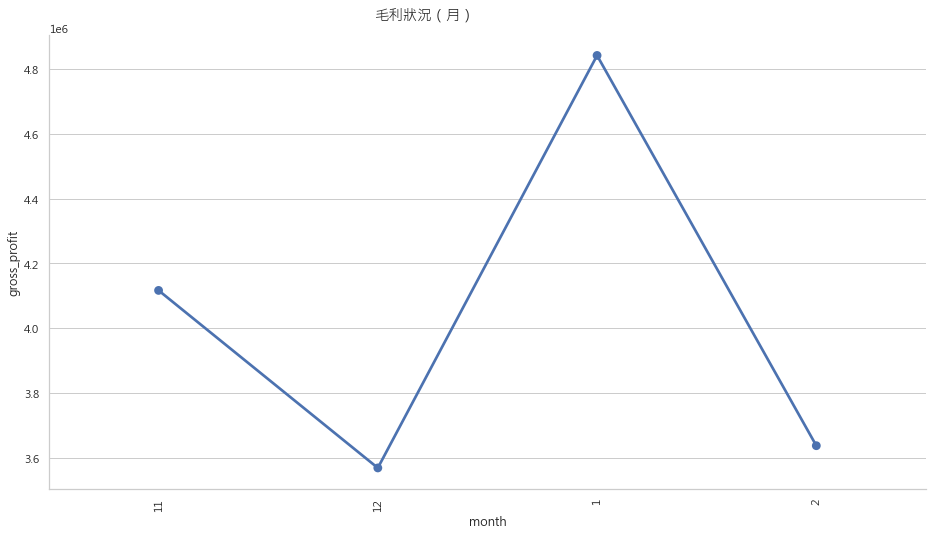

In [15]:
ax = sns.factorplot(x="month", 
                    y="gross_profit", 
                    estimator=np.sum,
                    data=pdbar
                    #kind = 'bar,swarm,violin,box'
                    )
ax.set_xticklabels(rotation=90)
ax.fig.suptitle('毛利狀況（月）')
plt.gcf().set_size_inches(15, 8)

## 觀察最低毛利潤 12月的變化 12月1日~12月31日

In [16]:
pdbar = df[['Date','gross_profit']].groupby('Date', as_index = False)['gross_profit'].sum()
pdbar

,Date,gross_profit
0,2000-11-01,14278
1,2000-11-02,130448
2,2000-11-03,139951
3,2000-11-04,204349
4,2000-11-05,291822
...,...,...
115,2001-02-24,165157
116,2001-02-25,254420
117,2001-02-26,77882
118,2001-02-27,75444


In [17]:
## 轉換時間格式
date = []
for i in range(len(pdbar)):
    date.append(datetime.strftime(pdbar['Date'][i], '%m-%d'))
pdbar['Date'] = date

/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


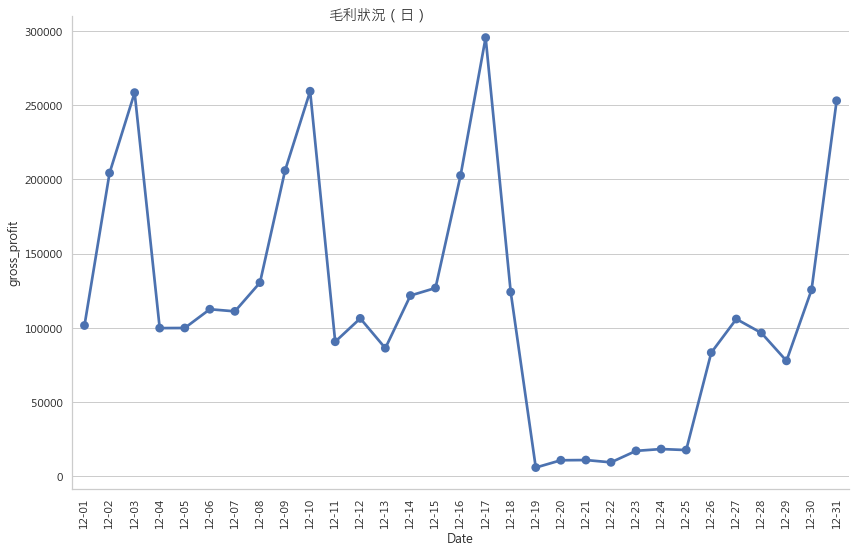

In [18]:
ax = sns.factorplot(x="Date", 
                    y="gross_profit", 
                    estimator=np.sum,
                    data=pdbar[30:61]
                    #kind = 'bar,swarm,violin,box'
                    )
ax.set_xticklabels(rotation=90)
ax.fig.suptitle('毛利狀況（日）')
plt.gcf().set_size_inches(15, 8)

## 根據賺取利潤最高的前五名產品 分別查看各年齡層的購買狀況

## 過濾出利潤最高的前五名商品種類

In [19]:
profite_high_product = df[df['PRODUCT_SUBCLASS'].isin(pdbar_top['PRODUCT_SUBCLASS'].values)]
profite_high_product 

,TRANSACTION_DT,CUSTOMER_ID,AGE_GROUP,PIN_CODE,PRODUCT_SUBCLASS,PRODUCT_ID,AMOUNT,ASSET,SALES_PRICE,Date,gross_profit,month
33,11/1/2000,1848564,NaN,Unknown,320402,20546601,1,905,1129,2000-11-01,224,11
446,11/1/2000,1848564,NaN,Unknown,320402,20564100,1,946,1180,2000-11-01,234,11
639,11/2/2000,1227048,35-39,221,560201,4710036110050,2,590,718,2000-11-02,128,11
799,11/1/2000,214544,45-49,115,560402,8712045004784,1,370,425,2000-11-01,55,11
1123,11/1/2000,2068176,<25,221,560402,8712045000465,1,209,239,2000-11-01,30,11
...,...,...,...,...,...,...,...,...,...,...,...,...
817464,2/28/2001,576574,30-34,115,560201,4710054510139,1,304,415,2001-02-28,111,2
817499,2/28/2001,271622,45-49,115,560201,4710036008548,5,945,945,2001-02-28,0,2
817606,2/28/2001,1586732,35-39,221,560201,4901301046710,1,303,329,2001-02-28,26,2
817612,2/28/2001,598484,35-39,115,560201,7610053910787,2,620,678,2001-02-28,58,2


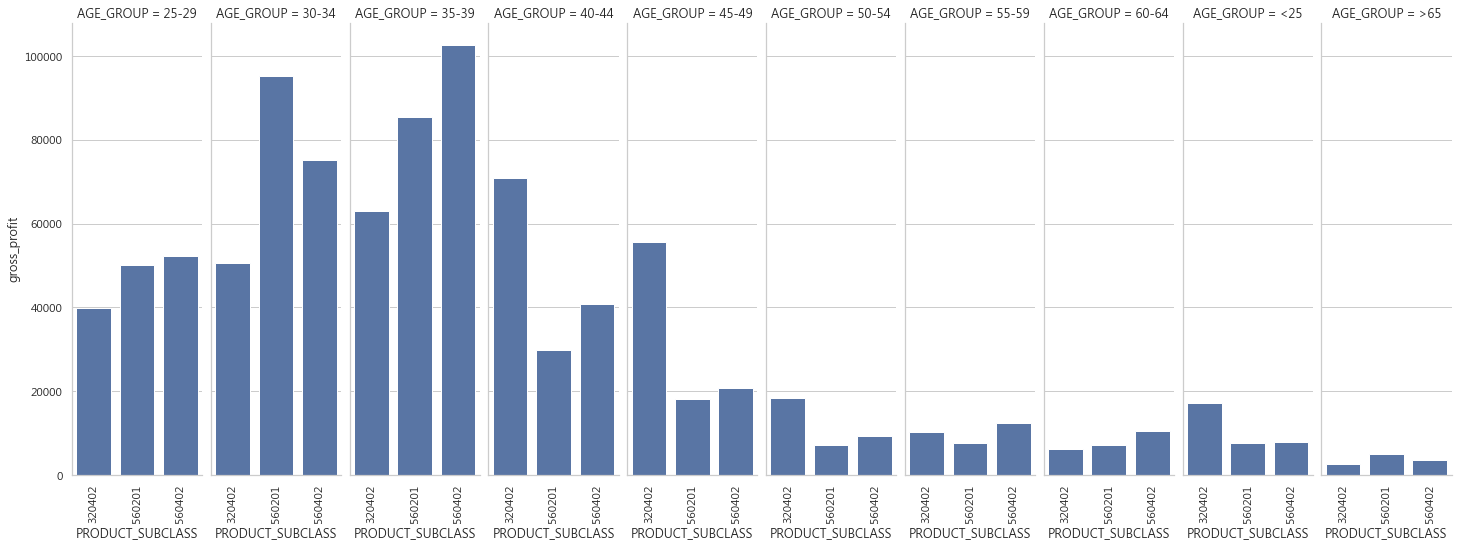

In [20]:
pdbar = profite_high_product[['PRODUCT_SUBCLASS','AGE_GROUP','gross_profit']].groupby(["PRODUCT_SUBCLASS",'AGE_GROUP'], as_index = False)['gross_profit'].sum()
ax = sns.FacetGrid(pdbar, col="AGE_GROUP")
ax.map_dataframe(sns.barplot, 
                    x='PRODUCT_SUBCLASS',
                   y="gross_profit")
ax.set_xticklabels(rotation=90)
plt.gcf().set_size_inches(20, 10)